## Importando e configurando Dataset

O dataset utilizado possui as seguintes colunas:

*   0. Número de vezes em que ficou grávida.
*   1. Concentração de glicose.
*   2. Pressão diastólica (mm Hg).
*   3. Espessura da dobra cutânea do tríceps (mm).
*   4. Insulina (mu U/ml).
*   5. Índice de massa corporal (peso em kg/(altura em m)^2).
*   6. Histórico familiar de diabetes.
*   7. Idade (anos).
*   8. Classificação (0 ou 1 - 0 não diabético / 1 diabético ).

Este dataset não possui um cabeçalho definido. Desse modo, você deve utilizar a leitura, através do módulo pandas, fornecendo o parâmetro que NÃO considera a primeira linha como cabeçalho.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [19]:
df = pd.read_csv('https://github.com/viniciusad/IGTI-bootcamp/raw/main/dataset-indians-diabetes.csv', 
                 header=None, names=['Gestacoes', 
                        'Glicose', 
                        'Pressao', 
                        'Dobra_Cutanea', 
                        'Insulina', 
                        'IMC', 
                        'Historico_Familiar', 
                        'Idade', 
                        'Diabetico'])
df.head()

,Gestacoes,Glicose,Pressao,Dobra_Cutanea,Insulina,IMC,Historico_Familiar,Idade,Diabetico
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gestacoes           768 non-null    int64  
 1   Glicose             768 non-null    int64  
 2   Pressao             768 non-null    int64  
 3   Dobra_Cutanea       768 non-null    int64  
 4   Insulina            768 non-null    int64  
 5   IMC                 768 non-null    float64
 6   Historico_Familiar  768 non-null    float64
 7   Idade               768 non-null    int64  
 8   Diabetico           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
df.shape

(768, 9)

In [22]:
df.describe()

,Gestacoes,Glicose,Pressao,Dobra_Cutanea,Insulina,IMC,Historico_Familiar,Idade,Diabetico
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
# Pergunta 3:
# Qual é a idade (coluna 7) média dos pacientes que são diabéticos (coluna 8=1)?

df.query("Diabetico == 1").mean()

Gestacoes               4.865672
Glicose               141.257463
Pressao                70.824627
Dobra_Cutanea          22.164179
Insulina              100.335821
IMC                    35.142537
Historico_Familiar      0.550500
Idade                  37.067164
Diabetico               1.000000
dtype: float64

In [24]:
# Pergunta 4:
# Dentre os pacientes que NÃO tiveram diabetes (coluna 8 =0),
#  qual é o número máximo de gestações (coluna 0) existentes?

df.query("Diabetico == 0").max()

Gestacoes              13.000
Glicose               197.000
Pressao               122.000
Dobra_Cutanea          60.000
Insulina              744.000
IMC                    57.300
Historico_Familiar      2.329
Idade                  81.000
Diabetico               0.000
dtype: float64

In [27]:
# Pergunta 5:
# Qual é a afirmação CORRETA sobre o valor 3,0 para a característica 
# número de gestações(coluna 0)?
# Apresenta o valor médio para a coluna 0.
# Indica que o desvio padrão é menor do que 3. 
# Indica que existem 50 valores maiores que 3 e 50 valores menores do que 3.
# Indica que 50% dos valores presentes nessa coluna são maiores que 3.(CORRETA)
df["Gestacoes"].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Gestacoes, dtype: float64

In [29]:
df["Glicose"].mean()

120.89453125

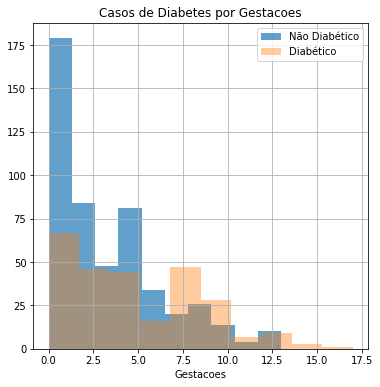

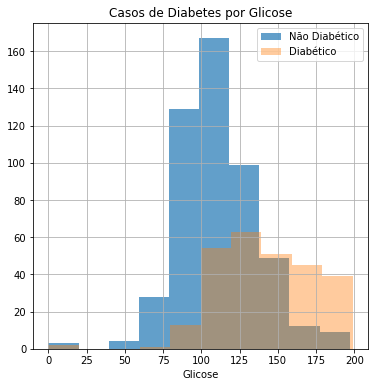

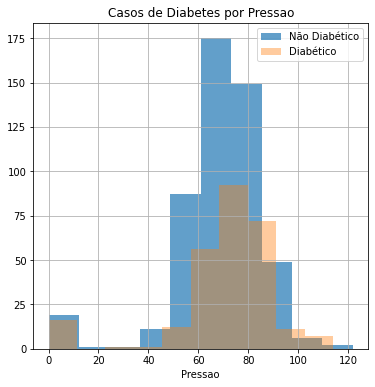

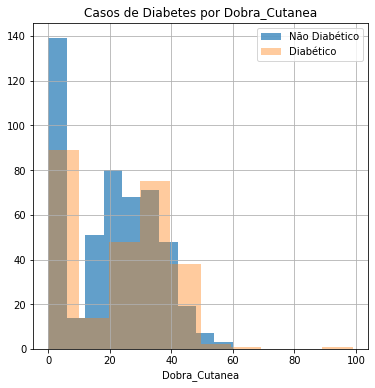

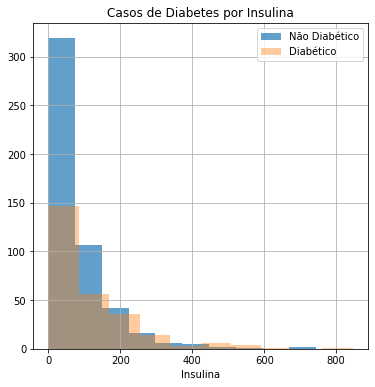

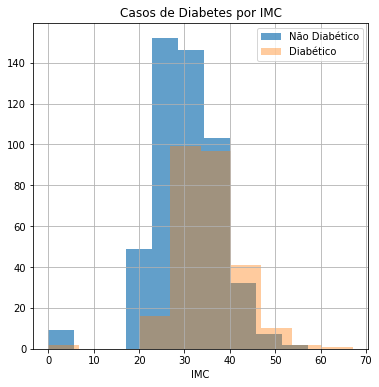

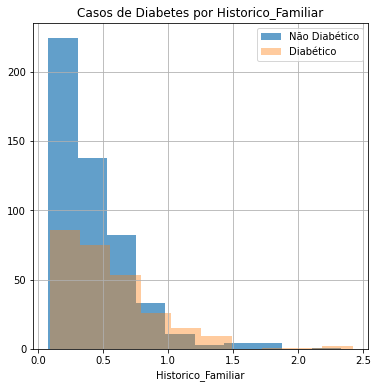

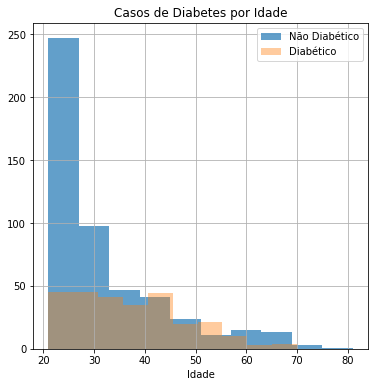

In [25]:
# Histograma dos casos de Diabetes por atributos
def plot_histograma_atributo(df, atributo): 
  nao_diabetico = df[(df.Diabetico == 0)][atributo]
  diabetico = df[(df.Diabetico == 1)][atributo]

  fig, ax = plt.subplots(figsize=(6,6))
  nao_diabetico.hist(ax=ax, label="Não Diabético", bins=10, alpha = .7)
  diabetico.hist(ax=ax, label="Diabético", bins=10, alpha = .4)
  ax.set_title(f"Casos de Diabetes por {atributo}")
  ax.set_xlabel(atributo)
  ax.legend()
  plt.show()
  fig.savefig(f"distribuições_{atributo}.png" )
  

atributos = df.columns[:-1]

ims = []
for atributo in atributos:
  plot_histograma_atributo(df, atributo)

## Aprendizado de máquina

### Processamento dos dados

In [30]:
df.columns

Index(['Gestacoes', 'Glicose', 'Pressao', 'Dobra_Cutanea', 'Insulina', 'IMC',
       'Historico_Familiar', 'Idade', 'Diabetico'],
      dtype='object')

In [35]:
# Entrada / Saída
x = df.drop(columns=['Diabetico'])
y = df['Diabetico']

In [36]:
# Normalização dos dados
from sklearn.preprocessing  import MinMaxScaler

normaliza = MinMaxScaler() #objeto para a normalização
entradas_normalizadas=normaliza.fit_transform(x)

In [37]:
# treino / teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(entradas_normalizadas, y, test_size=0.30,random_state=42)

In [38]:
X_train.shape

(537, 8)

### ajuste dos modelos

In [39]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)
y_pred = clf_KNN.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6796536796536796

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=1)
clf_DT.fit(X_train, y_train)
y_pred = clf_DT.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.696969696969697

In [42]:
from sklearn.neural_network import MLPClassifier
clf_MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10), random_state=1)
clf_MLP.fit(X_train, y_train)
y_pred = clf_MLP.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7445887445887446

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(max_depth=10, random_state=1)
clf_RF.fit(X_train, y_train)
y_pred = clf_RF.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7445887445887446

In [44]:
from sklearn.svm import SVC
clf_SVC = SVC(gamma='auto',random_state=1)
clf_SVC.fit(X_train, y_train)
y_pred = clf_SVC.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7705627705627706

### validação cruzada

In [47]:
import numpy as np
SEED = 1232
np.random.seed(SEED)
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

# validação cruzada
def val_cruzada(model, x, y, n_splits=10, **kwargs):
  partes = KFold(n_splits, shuffle=True)
  modelo = model(**kwargs)
  resultados = cross_validate(modelo, x, y, cv=partes, scoring="accuracy")
  return resultados['test_score']

In [48]:
import matplotlib.pyplot as plt
# plot hist validação cruzada
def plot_hist_val_cruzada(title, model, x_treino, y_treino, n_splits=10, **kwargs):
  data = val_cruzada(model=model, x=x_treino, y=y_treino, n_splits=n_splits, **kwargs)
  ax.hist(data, bins=20, label=title, alpha = .4)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = dict(
    KNeighborsClassifier={"model": KNeighborsClassifier, "kwargs":dict(n_neighbors=5)},
    RandomForestClassifier={"model": RandomForestClassifier, "kwargs":dict(max_depth=10, random_state=1)},
    SVC={"model": SVC, "kwargs":dict(gamma='auto',random_state=1)}, 
    MLPClassifier={"model": MLPClassifier, "kwargs":dict(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10), random_state=1)},
)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

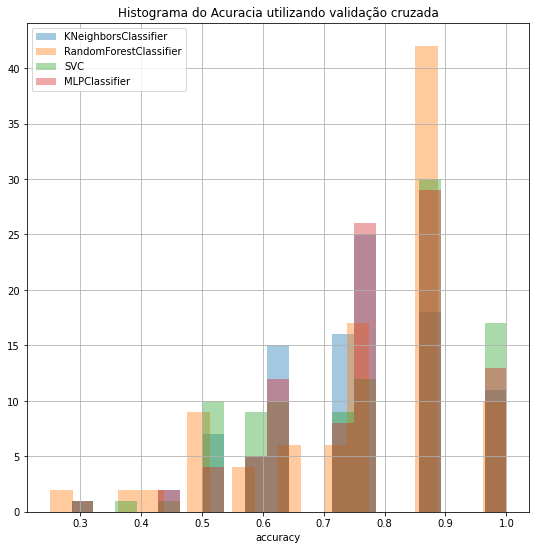

In [50]:
# Plot histograma de comparação

fig, ax = plt.subplots( figsize=(9, 9))
for i, name in enumerate(list(models.keys())):
  model=models[name]
  plot_hist_val_cruzada(title=name, model=model['model'],
                        x_treino=entradas_normalizadas, y_treino=y,
                        n_splits=100, **model['kwargs'])

plt.xlabel('accuracy')
plt.legend()
plt.grid()
plt.title("Histograma do Acuracia utilizando validação cruzada")
fig.savefig('cross_validat.png', bbox_inches='tight')
plt.show()

In [51]:
# validação cruzada
def val_cruzada(model, x, y, n_splits=10, **kwargs):

  partes = KFold(n_splits, shuffle=True)
  modelo = model(**kwargs)
  resultados = cross_validate(modelo, x, y, cv=partes, scoring="accuracy", return_train_score=True)
  return resultados['train_score'].mean(), resultados['test_score'].mean()


r_train = []
r_test = []
n_est = []
max_d = []

for n_estimators_ in range(1,31):
  for max_depth_ in range(1,31):
    kwargs = dict(max_depth=max_depth_, n_estimators=n_estimators_, random_state=SEED)
    r = val_cruzada(model=RandomForestClassifier, x=x, y=y, n_splits=10, **kwargs)
    r_train.append(r[0])
    r_test.append(r[1])
    n_est.append(n_estimators_)
    max_d.append(max_depth_)


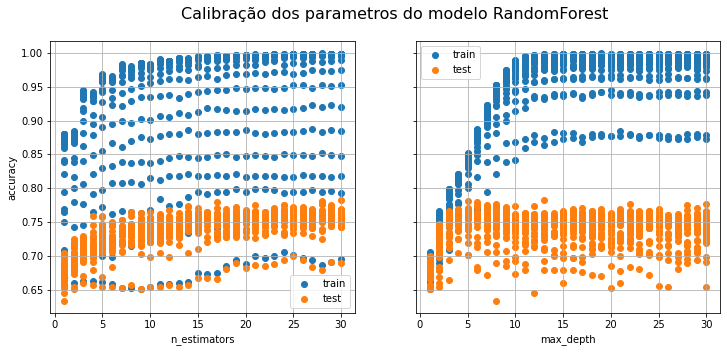

In [52]:
# Plot
fig, ax = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
ax = ax.ravel()

ax[0].scatter(n_est, r_train, label='train')
ax[0].scatter(n_est, r_test, label='test')

ax[1].scatter(max_d, r_train, label='train')
ax[1].scatter(max_d, r_test, label='test')

ax[0].grid()
ax[0].set_ylabel("accuracy")
ax[0].legend()
ax[0].set_xlabel("n_estimators")

ax[1].grid()
ax[1].legend()
ax[1].set_xlabel("max_depth")

plt.text(-25, 1.05, r'Calibração dos parametros do modelo RandomForest', size=16)

fig.savefig('hiper_param.png', bbox_inches='tight')

# Concorrencia

In [53]:
import time
import random
def contador():
  x = 10**9
  while x > 0:
    x -= 1
    # time.sleep(random.randint(1,20))


def imple_sequencial():
  contador()
  contador()

import threading
def imple_concorrente():
  t1 = threading.Thread(contador()) 
  t2 = threading.Thread(contador()) 
  t1.start() 
  t2.start()
  t1.join()
  t2.join()


In [54]:
ti = time.time()
imple_sequencial()
print(f'tempo de execução imple_sequencial { time.time() - ti }')

tempo de execução imple_sequencial 108.8767442703247


In [55]:
ti = time.time()
imple_concorrente()
print(f'tempo de execução imple_concorrente { time.time() - ti }')

tempo de execução imple_concorrente 107.69442415237427


# Programação reativa

In [56]:
!pip install rx

     |████████████████████████████████| 204kB 12.1MB/s 


In [57]:
import rx
import rx.operators as ops

In [58]:
source = rx.from_iterable([5,4,3,"2",1]) #streaming
disposable = source.pipe(
    ops.filter(lambda i: i%2 == 0)
).subscribe(
    on_next=lambda i: print("on_next: {}".format(i)),
    on_completed=lambda: print("on_completed"),
    on_error=lambda e:print("on_error: {}".format(e)),
) #inscrição do observer

on_next: 4
on_error: not all arguments converted during string formatting
